In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("./Iris.csv")

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,YearCollected,MonthCollected,StigmaLength,Species
0,1,5.1,3.5,1.4,0.2,Purple,2003,2,2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Orange,1998,9,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Black,1995,5,3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,White,2008,3,3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Teal,2007,9,1,Iris-setosa


dropping columns

In [27]:
df = df.drop("YearCollected", axis=1)
df = df.drop("MonthCollected", axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,StigmaLength,Species
0,1,5.1,3.5,1.4,0.2,Purple,2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Orange,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Black,3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,White,3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Teal,1,Iris-setosa


In [28]:
# One-Hot Encoding

encoder=ce.OneHotEncoder(cols='FlowerColour',handle_unknown='return_nan',return_df=True,use_cat_names=True)

df = encoder.fit_transform(df)

train test split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(["Species"], axis=1),
    df["Species"],
    test_size=0.3,
    random_state=0
)

## Pearson Correlation

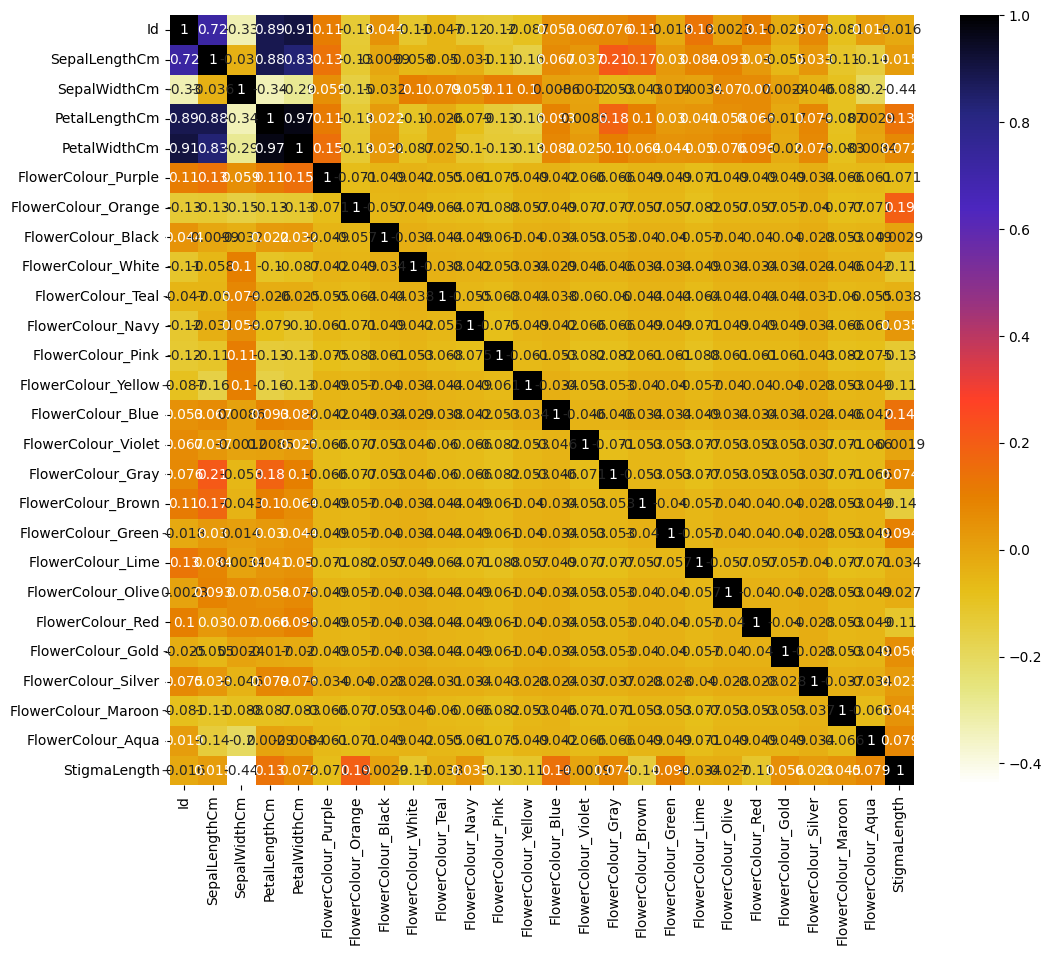

In [30]:
plt.figure(figsize=(12, 10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [31]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [32]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3

In [33]:
corr_features

{'PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm'}

In [34]:
X_train.drop(corr_features, axis=1)
X_test.drop(corr_features, axis=1)

,Id,SepalWidthCm,FlowerColour_Purple,FlowerColour_Orange,FlowerColour_Black,FlowerColour_White,FlowerColour_Teal,FlowerColour_Navy,FlowerColour_Pink,FlowerColour_Yellow,...,FlowerColour_Brown,FlowerColour_Green,FlowerColour_Lime,FlowerColour_Olive,FlowerColour_Red,FlowerColour_Gold,FlowerColour_Silver,FlowerColour_Maroon,FlowerColour_Aqua,StigmaLength
114,115,2.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
62,63,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15
33,34,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
107,108,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,8,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
100,101,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
40,41,3.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
86,87,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
76,77,2.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20
71,72,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14


## Kendalls Tau

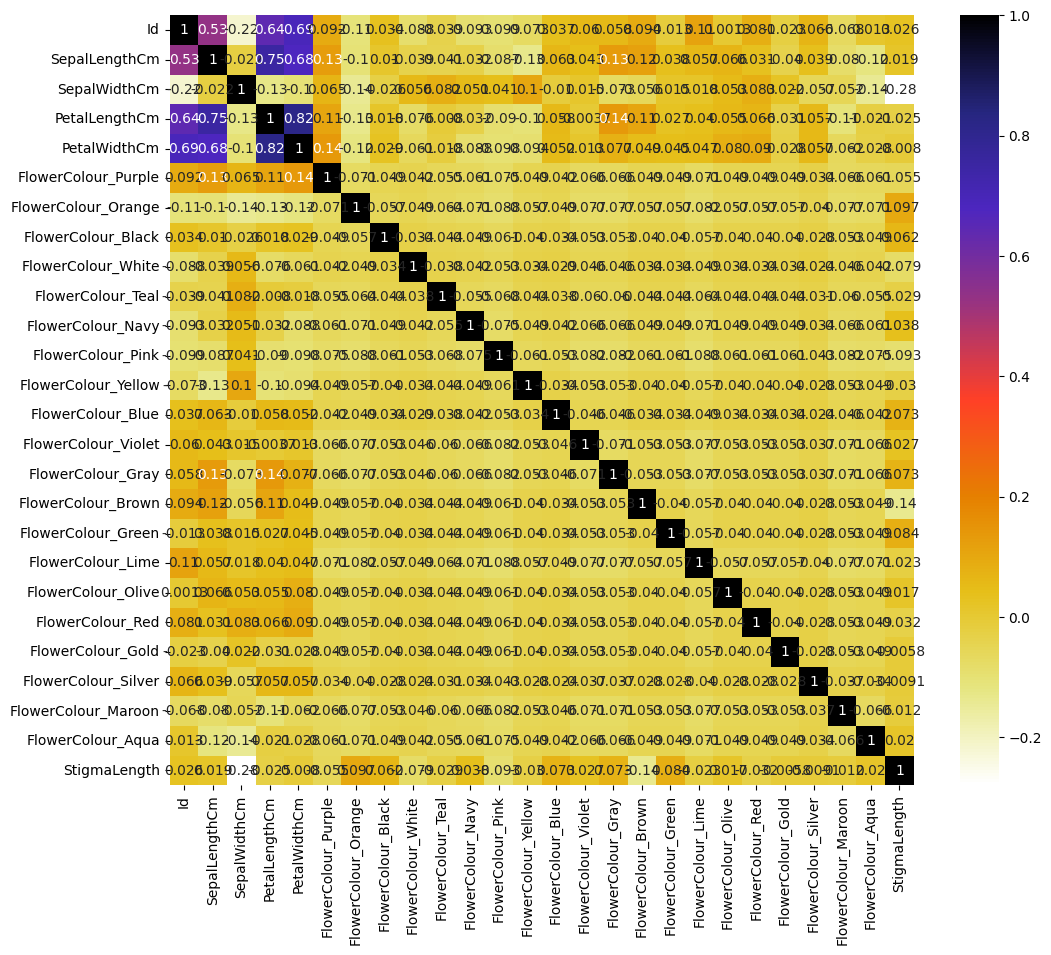

In [35]:
plt.figure(figsize=(12, 10))
cor = X_train.corr(method='kendall')
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

3